In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cardiogoodfitness/CardioGoodFitness.csv


In [2]:
CardioDf = pd.read_csv('/kaggle/input/cardiogoodfitness/CardioGoodFitness.csv')
CardioDf

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120


In [3]:
print(len(CardioDf.index))
CardioDf.isna().sum()
#No NA values, data is relively clean. 

180


Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [4]:
#Number of each product being used
CardioDf.groupby(['Product'])['Product'].count()

Product
TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='Count'>

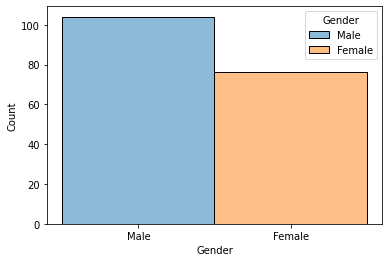

In [5]:
#Male vs Female Counts
CardioDf.groupby(['Gender'])['Gender'].count()
sns.histplot(data=CardioDf, x="Gender", hue = 'Gender')

<AxesSubplot:xlabel='Age', ylabel='Miles'>

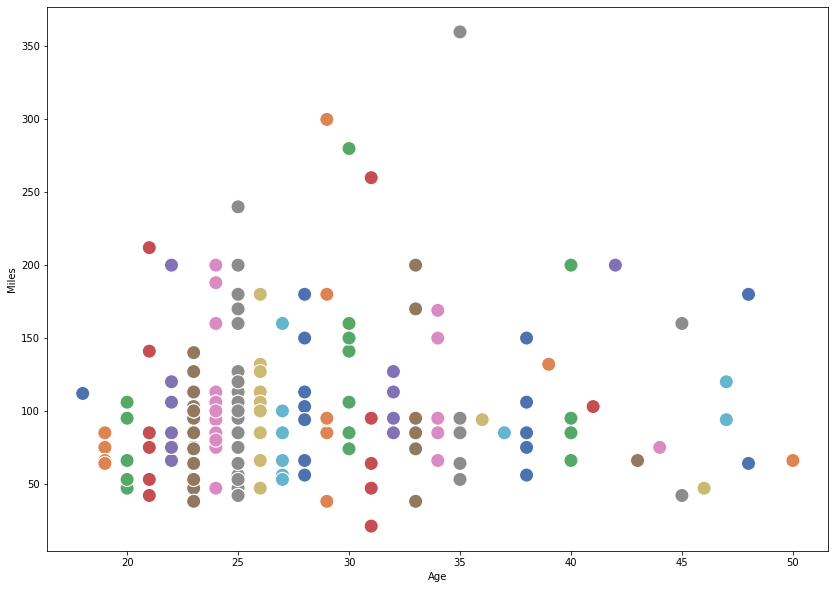

In [6]:
#Age and Miles plot
plt.figure(figsize=(14,10))
sns.scatterplot(data = CardioDf, x = 'Age', y = 'Miles', hue = 'Age',palette = 'deep', legend = False, s = 200)


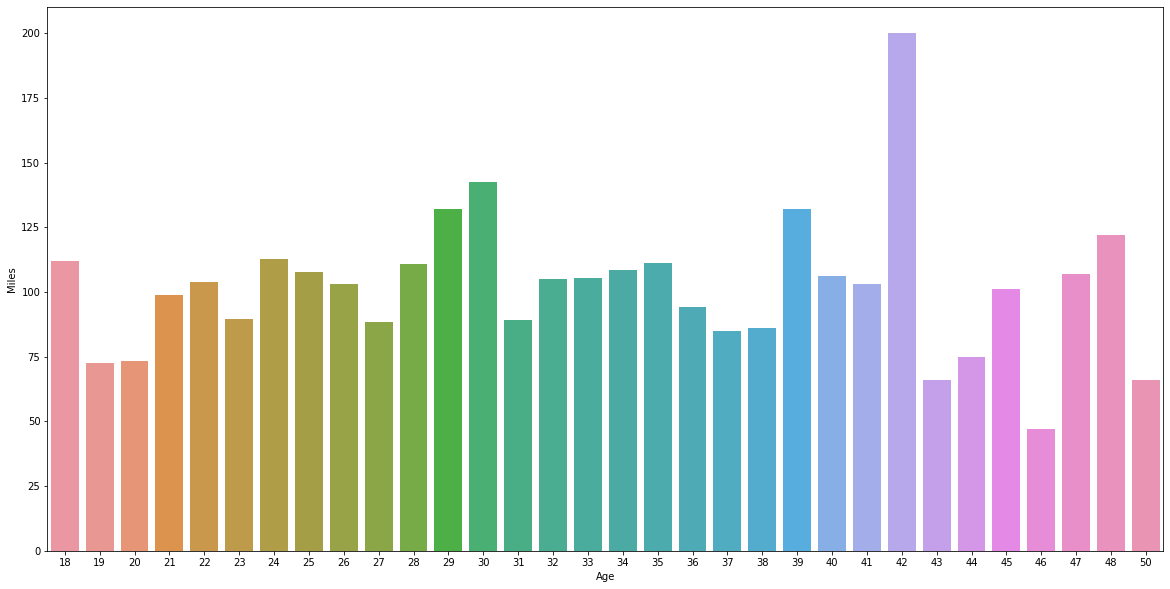

In [7]:
#Average number of miles per age

AgeMiles= CardioDf.groupby(['Age'])['Miles'].mean()
AgeMiles = AgeMiles.to_frame().reset_index()

plt.figure(figsize=(20,10))
sns.barplot(data=AgeMiles, x="Age", y = 'Miles')
plt.show()
#df.hist(AgeMiles)

0.7857017433982372

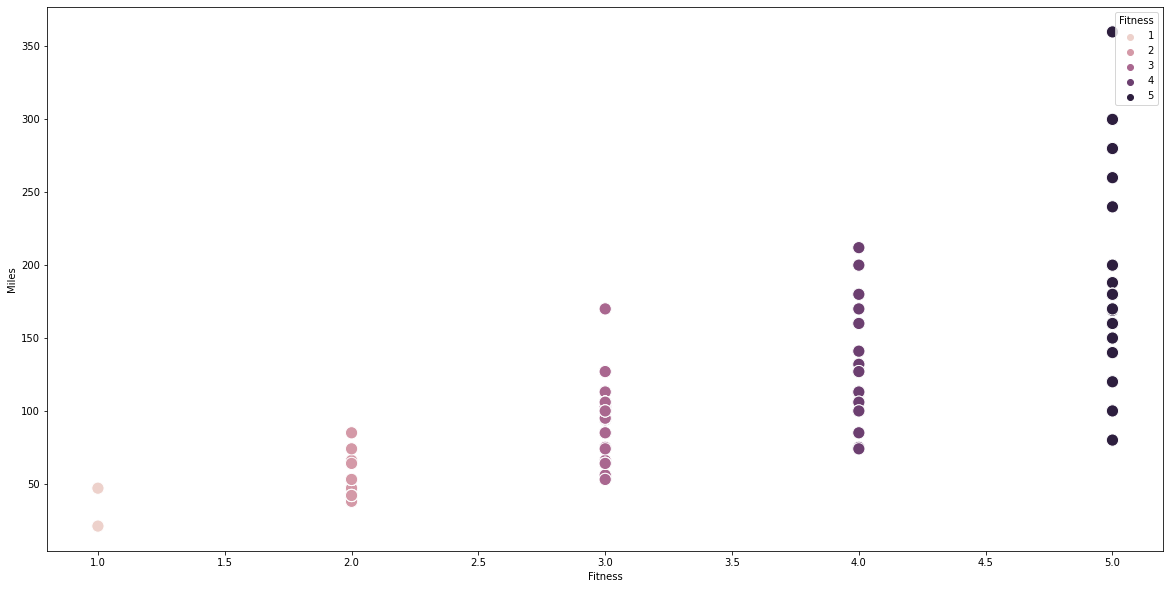

In [8]:
#Fitness level vs reported miles
plt.figure(figsize=(20,10))
sns.scatterplot(data = CardioDf, y = CardioDf['Miles'], x = CardioDf['Fitness'],hue = 'Fitness', s = 150)

#correlation between higher miles and more fitness
CardioDf['Miles'].corr(CardioDf['Fitness'])
#Strong relationship between reported fitness level and reported miles
#0.7857017433982372



In [9]:
corr = CardioDf.corr()
corr
#Takeaway
    #Low correlation between age and usage 
    #Low correlation between age and miles 
    #Moderate correlation between Education and income 
    #Moderate correlation between fitness and usage
    #Moderate correlation between income and fitness

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<AxesSubplot:>

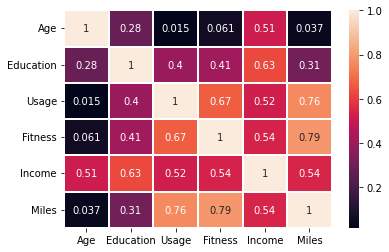

In [10]:
sns.heatmap(corr, annot=True, linewidths=.1)

In [11]:
#Does which product used depend on fitness level 
CardioDf['Product'].unique()
newMap = {'TM195': 0, 'TM498': 1, 'TM798': 2}
CardioDfProduct = CardioDf.applymap(lambda s: newMap.get(s) if s in newMap else s)
CardioDfProduct['Product'].corr(CardioDfProduct['Fitness'])
#.59
#Moderate correlation between the type of product you use and the amount of fitness you have 


0.5948832140406117

In [12]:
#Which product gives the best fitness on average
#average fitness level each product

CardioTM195 = CardioDfProduct.groupby(['Product']).mean()
CardioTM195
#Takeaway
    #Fitness level is best with the TM798
    #More miles on the 166.9
    #Higher income for the TM798, we may be able to infer from this that the TM798 is the higher end machie
    #for customers who are more serious
    #More usage with the TM798

,Age,Education,Usage,Fitness,Income,Miles
Product,,,,,,
0,28.55,15.037500,3.087500,2.9625,46418.025,82.787500
1,28.90,15.116667,3.066667,2.9000,48973.650,87.933333
2,29.10,17.325000,4.775000,4.6250,75441.575,166.900000


In [13]:
#if a person is single or not, does that impact their fitness level
newMap = {'Single': 0, 'Partnered': 1}
CardioDfMar = CardioDf.applymap(lambda s: newMap.get(s) if s in newMap else s)
CardioDfMar['MaritalStatus'].corr(CardioDfMar['Fitness'])
#Weak relation, maritial status doesn't effect fitness. 

-0.05075071111312666